<a href="https://colab.research.google.com/github/nicole-d-ai/webscrapping/blob/main/TP2_webscrapping_preprocesamiento.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 💚 Pasión en palabras: Webscraping + NLP en español (TP1)

**Nombre:** Nicole Ferreyra

**Profesora:** Ana Laura Diedrichs

**Materia:** Procesamiento del Habla

**Tema:** webscrapping

*Instituto Santo Domingo*

📌 EJERCICIO CONSIGNA

* Cree una nube de palabras de un texto en español.

* Dicho texto puede ser descargado de Internet (webscrapping) o extraído del dataset de alguna librería.

* Puede usar cualquier libreria o herramienta para obtener el texto de su interés.

* En este notebook explica el paso a paso del proceso.

url con la que voy a trabajar: https://emiliaendevini.com/2019/03/27/isabel-allende-y-la-pasion/



# 1- Webscrapping

Extrae un texto de Internet de una sóla página web usando alguna de las técnicas de webscrapping vistas en clase. Busca el discurso de alguna persona quien te inspire o haya dado una charla motivadora.

No puedes repetir ni usar ni el mismo texto ni la misma web que otra persona quien ya entregó en el foro.

Abajo añade los bloques de código y texto necesarios. Explica paso a paso como descargaste el texto de tu interés.

# 👉 Paso 0: Instalar dependencias

In [14]:
!pip install requests beautifulsoup4 html5lib

# Paso 1: Extraer la web

**Objetivo: descargar el HTML y quedarte con los párrafos del contenido (no menús, no pie de página, no widgets).**

El script descarga una página, parsea el HTML, extrae los "p" del cuerpo del artículo, limpia el texto y lo guarda en un .txt. Eso satisface “extraer un texto de Internet de una sola página web usando **webscrapping**”.

Mini checklist para la entrega

✅Una sola URL (no repetida por tus compañeros).

✅Código + explicación paso a paso.

✅Extracción con requests + BeautifulSoup.

✅Limpieza básica (NBSP, espacios, filtro de párrafos cortos).

✅Impresión y guardado del texto.

In [15]:
import requests
from bs4 import BeautifulSoup
import re

url = "https://emiliaendevini.com/2019/03/27/isabel-allende-y-la-pasion/"

r = requests.get(url, timeout=60)
r.raise_for_status()

sitio = BeautifulSoup(r.text, "html.parser")

contenedor = sitio.select_one(".entry-content") or sitio

parrafos = []
for p in contenedor.find_all("p"):
    texto = p.get_text(" ", strip=True)
    parrafos.append(texto)

texto = "\n\n".join(parrafos)
texto = texto.replace("\xa0", " ")
texto = re.sub(r"[ \t]+", " ", texto).strip()

print(texto)

with open("texto_fuente.txt", "w", encoding="utf-8") as f:
    f.write(texto)
print("Guardado en texto_fuente.txt")


Palabras para el coloquio «Alzando la Voz en defensa propia. Ahora y siempre». Torrejón de Ardoz (Madrid) Marzo 2018

Tenía 13 años cuando leí por
primera vez a Isabel Allende. Un libro
que me regalo mi madre, Cuentos de Eva Luna, me llevó a conocer historias y
personajes que hablaban de amor, de esperanza, de tragedia y de pasión. Si
tuviera que hablar qué supuso para mí descubrir a esta escritora se me
quedarían cortas las palabras, pues tiene que ver con algo más profundo que
simplemente un gusto por su forma de escribir o por sus historias de pasión y
magia. Es algo más emocional.

Allende, habla de una enorme cadena
de mujeres, conectadas entre sí, por un elemento crucial que atraviesa su experiencia
en este mundo. Haber nacido mujeres en un mundo donde somos “el segundo sexo”,
la otra mitad, las ninguneadas, hace que de alguna manera estemos todas unidas
por un hilo invisible, teniendo incluso vidas muy diferentes y padeciendo menor
o mayor grado de desigualdad, según donde nos h

# 2- Preprocesamiento


**2.1 Muestra las stop words que tenga tu texto.**

In [16]:
!pip install -q spacy

In [17]:
!python -m spacy download es_core_news_sm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.9/12.9 MB 29.0 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('es_core_news_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [18]:
import spacy
from collections import Counter

nlp = spacy.load("es_core_news_sm")

try:
    texto
except NameError:
    with open("texto_fuente.txt", "r", encoding="utf-8") as f:
        texto = f.read()

doc = nlp(texto)

stop_tokens = []

for token in doc:
    if token.is_stop and token.is_alpha:
        stop_tokens.append(token.text.lower())

freq = Counter(stop_tokens)

#Resultados
print("Total de Stopwords (tokens)", len(stop_tokens))
print("\nStopwords disitintas:", len(freq))
print("\nStopwords únicas (ordenadas)")
print(sorted(freq.keys()))

print("\nTop 20 por frecuencia:")
for word, conteo in freq.most_common(20):
    print(f"{word}: {conteo}")


Total de Stopwords (tokens) 419

Stopwords disitintas: 108

Stopwords únicas (ordenadas)
['a', 'ahora', 'al', 'algo', 'alguna', 'anterior', 'antes', 'aquellas', 'aquello', 'así', 'como', 'con', 'conocer', 'contra', 'cuando', 'cuánto', 'da', 'dar', 'de', 'decir', 'dejó', 'del', 'desde', 'dice', 'diferentes', 'donde', 'dos', 'el', 'ella', 'en', 'entre', 'es', 'eso', 'esta', 'estamos', 'este', 'esto', 'está', 'ha', 'haber', 'habla', 'hace', 'hacen', 'hacer', 'haya', 'incluso', 'la', 'largo', 'las', 'le', 'lo', 'manera', 'mayor', 'me', 'mi', 'misma', 'mucha', 'mucho', 'muy', 'más', 'mí', 'no', 'nos', 'nuestra', 'nuestro', 'o', 'otra', 'para', 'pero', 'poder', 'por', 'porque', 'primera', 'propia', 'pueden', 'pues', 'que', 'qué', 'se', 'sea', 'segundo', 'según', 'si', 'sido', 'siempre', 'sin', 'somos', 'son', 'su', 'sus', 'suyo', 'sí', 'tal', 'también', 'tener', 'tenía', 'tiene', 'todas', 'todo', 'través', 'un', 'una', 'vamos', 'varias', 'ver', 'vez', 'y', 'ya']

Top 20 por frecuencia:
de: 4

2.2 Quita las stop-words, caracteres extraños del texto. Utiliza el texto restante para crear una nube de palabras. Usa la biblioteca worldcloud de python.

In [19]:
!pip install wordcloud

Limpiar texto (sin stopwords ni "raros") y lematizar con SpaCy
Usamos el doc que ya creamos

In [20]:
import re

tokens_limpios = []

for token in doc:
    if token.is_alpha and not token.is_stop:
        lema = token.lemma_.lower().strip()
        if len(lema) >= 3:
            tokens_limpios.append(lema)

texto_limpio = " ".join(tokens_limpios)

print("Tokens finales", len(tokens_limpios))
print("Muestra:", tokens_limpios[:30])

Tokens finales 245
Muestra: ['palabras', 'coloquio', 'alzar', 'voz', 'defensa', 'torrejón', 'ardoz', 'madrid', 'marzo', 'año', 'leer', 'isabel', 'allende', 'libro', 'regalar', 'madre', 'cuentos', 'eva', 'luna', 'llevar', 'historia', 'personaje', 'hablar', 'amor', 'esperanza', 'tragedia', 'pasión', 'tener', 'hablar', 'suponer']


# Nube de palabras con wordcloud

(np.float64(-0.5), np.float64(1199.5), np.float64(599.5), np.float64(-0.5))

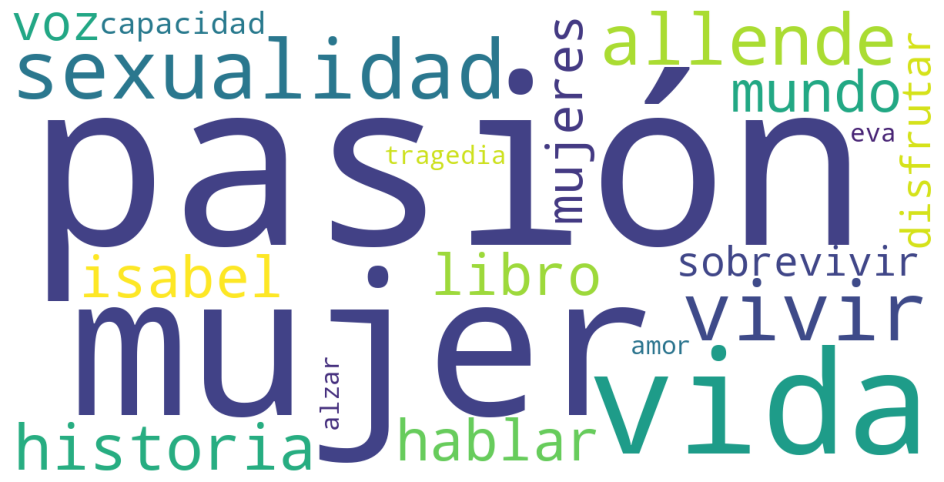

In [21]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Crear la nube de palabras
wc = WordCloud(
    width=1200,
    height=600,
    background_color="white",
    collocations=False,   # NO juntar frases frecuentes
    max_words=20,
    colormap="viridis",
).generate(texto_limpio)

# Mostrar la nube de palabras
plt.figure(figsize=(12, 6))
plt.imshow(wc)
plt.axis("off")

2.3 Usando el texto que conseguiste en el punto 1).
2.3.1 Limpia y preprocesa el texto, descomponelo en oraciones, arma una matriz documento-vocabulario.

In [22]:
import re

oraciones = []
for span in doc.sents:
    if re.search(r"[A-Za-zÁÉÍÓÚÜÑáéíóúüñ]", span.text):
        oraciones.append(span.text)

def limpiar_oracion(oracion):
    doc = nlp(oracion)
    lemas_filtrados = [
        token.lemma_.lower()
        for token in doc
        if token.is_alpha and not token.is_stop and len(token.lemma_) >=3
    ]
    return " ".join(lemas_filtrados)

oraciones_limpias = []
for oracion in oraciones:
    oracion_limpia = limpiar_oracion(oracion)
    if oracion_limpia.strip():
        oraciones_limpias.append(oracion_limpia)

print("Oraciones limpias:", len(oraciones_limpias))
print(oraciones_limpias[:5])

Oraciones limpias: 32
['palabras coloquio alzar voz defensa', 'torrejón ardoz madrid marzo año leer isabel allende', 'libro regalar madre cuentos eva luna llevar historia personaje hablar amor esperanza tragedia pasión', 'tener hablar suponer descubrir escritora quedarir corta palabra profundo simplemente gusto forma escribir historia pasión magia', 'emocional allende enorme cadena mujer conectado elemento crucial atravesar experiencia mundo']


In [27]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizador = CountVectorizer()

X = vectorizador.fit_transform(oraciones_limpias)
vocab = vectorizador.get_feature_names_out()

print("Forma de la matriz (oraciones x palabras unicas):", X.shape)
print("\nLongitud de vocabulario:", len(vocab))
print("\nMuestra de terminos:", vocab[:25])

print("\nPrimeras 3 filas y 10 columnas:")
print(X.toarray()[:3, :10])


Forma de la matriz (oraciones x palabras unicas): (32, 158)

Longitud de vocabulario: 158

Muestra de terminos: ['aceptar' 'acercar' 'acto' 'adversidad' 'afrodita' 'alcemos' 'allende'
 'alzar' 'amor' 'ardoz' 'arma' 'arrebatar' 'atravesar' 'año' 'bruja'
 'caber' 'cadena' 'cambiar' 'campoamor' 'capacidad' 'castigo'
 'circunstancia' 'clara' 'coloquio' 'comedia']

Primeras 3 filas y 10 columnas:
[[0 0 0 0 0 0 0 1 0 0]
 [0 0 0 0 0 0 1 0 0 1]
 [0 0 0 0 0 0 0 0 1 0]]


2.3.3. Aplica TF-IDF a tu matriz documento-vocabulario

In [25]:
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np

tfidf = TfidfVectorizer()
X_tfidf = tfidf.fit_transform(oraciones_limpias)

vocab_tfidf = tfidf.get_feature_names_out()

print("Forma TF-IDF (docs x términos):", X_tfidf.shape)
print("Longitud del vocabulario TF-IDF:", len(vocab_tfidf))

print("\nMatriz TF-IDF (recorte redondeado):")
print(np.round(X_tfidf.toarray()[:3, :10], 3))

Forma TF-IDF (docs x términos): (32, 158)
Longitud del vocabulario TF-IDF: 158

Matriz TF-IDF (recorte redondeado):
[[0.    0.    0.    0.    0.    0.    0.    0.423 0.    0.   ]
 [0.    0.    0.    0.    0.    0.    0.267 0.    0.    0.376]
 [0.    0.    0.    0.    0.    0.    0.    0.    0.265 0.   ]]


Conclusiones
Agregue aquí sus conclusiones sobre este trabajo práctico. Puede ser también parte del texto que posteará en el foro.

Conclusiones

En este trabajo práctico realizamos el recorrido completo de preprocesamiento de texto: desde la descarga de un documento web, su limpieza, segmentación en oraciones y la transformación en representaciones numéricas.

Scraping y limpieza inicial: aprendimos a descargar el HTML de una página, extraer los párrafos y eliminar ruido (espacios raros, caracteres especiales, stopwords, palabras muy cortas). Esto nos permitió obtener un texto limpio listo para analizar.

Procesamiento con spaCy: utilizamos técnicas de tokenización, lematización y detección de stopwords, lo que nos permitió reducir las palabras a su forma base y quedarnos solo con términos relevantes.

Representación en oraciones: descompusimos el texto en oraciones y, tras limpiarlas, construimos una lista de documentos (cada oración es un documento). Esto nos llevó a la creación de la matriz documento-vocabulario.

Vectorización:

Con CountVectorizer obtuvimos una matriz basada en frecuencias de palabras.

Con TfidfVectorizer pasamos a una representación más refinada, donde cada término tiene un peso según su relevancia en cada oración y en todo el corpus.

Interpretación: observamos que palabras muy comunes (como artículos o preposiciones) pierden importancia, mientras que conceptos clave del texto reciben un peso mayor, ayudándonos a identificar qué términos son realmente representativos.

En resumen, el trabajo nos permitió comprender cómo transformar texto en datos numéricos para futuros análisis de minería de texto, y cómo técnicas como TF-IDF destacan la importancia relativa de cada palabra en un corpus.